In [1]:
# start with importing the libraries we need

%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hopfield_network import pattern_tools, plot_tools, network
import neurodynex3.hopfield_network.pattern_tools as tools

# Miniproject: Hopfield Networks

# 1. Theory

See report for theory answers

# 2. Capacity

### Question 2.2.

In [56]:
# Global variables

N = 100 # number of neurons considering for our pattern
T = 5 # time-steps for effectively stored patterns

pattern_size = 10 # Pattern size, chosen so that pattern_size**2 = 100 = N

# To obtain the probability that the first pattern is  is effectivley stored, we iterate the script a certain
# amount of time (number of hopfield models generated to estimate probability)
running_iterations = 100

#### Using code from neurodynex3 Python library:


In [57]:
# Number of patterns we are currently working with:
num_pattern_list = np.arange(0, 60, 5)
num_pattern_list[0] = 1 # Solving issue with zero patterns...

# When increasing number of patterns, retrieving probability
probability_list = []

In [58]:
for P in num_pattern_list:
    
    print('Running for '+str(P)+' patterns...')
    # create an instance of the class HopfieldNetwork
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)

    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

    identical_count = 0
    
    for i in range(running_iterations): # run the script some times

        pattern_list = []
        # add random patterns to the list (this value changes to obtain different probabilities for our plot)
        pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

        # let the hopfield network "learn" the patterns. Note: they are not stored
        # explicitly but only network weights are updated !
        hopfield_net.store_patterns(pattern_list)

        # initialize with original pattern
        hopfield_net.set_state_from_pattern(pattern_list[0])
        # from this initial state, let the network dynamics evolve. 
        states = hopfield_net.run_with_monitoring(nr_steps=T-1) # T-1 gets us to state 5

        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

        if (np.sum(states_as_patterns[-1] == pattern_list[0])) == 100:
            # We have identical patterns, one neuron state was flipped after 5 iterations
            identical_count += 1

    proba_correct = identical_count / running_iterations
    print("Probability that our pattern was correctly retrieved:" +str(proba_correct))

    probability_list.append(proba_correct)

Running for 1 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 5 patterns...
Probability that our pattern was correctly retrieved:1.0
Running for 10 patterns...
Probability that our pattern was correctly retrieved:0.96
Running for 15 patterns...
Probability that our pattern was correctly retrieved:0.62
Running for 20 patterns...
Probability that our pattern was correctly retrieved:0.39
Running for 25 patterns...
Probability that our pattern was correctly retrieved:0.11
Running for 30 patterns...
Probability that our pattern was correctly retrieved:0.03
Running for 35 patterns...
Probability that our pattern was correctly retrieved:0.0
Running for 40 patterns...
Probability that our pattern was correctly retrieved:0.0
Running for 45 patterns...
Probability that our pattern was correctly retrieved:0.0
Running for 50 patterns...
Probability that our pattern was correctly retrieved:0.0
Running for 55 patterns...
Probability that our pattern was correctly ret

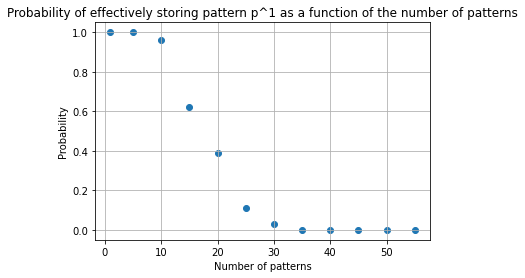

In [60]:
# Plotting the probability for pattern p^1 to be effectively stored, as a function of the number of patterns

plt.figure()
plt.scatter(num_pattern_list, probability_list)
plt.xlabel('Number of patterns')
plt.ylabel('Probability')
plt.title('Probability of effectively storing pattern p^1 as a function of the number of patterns')
plt.grid(True)

#### Implementing alternative and more efficient method to store patterns: and checking if weights are still the same

In [ ]:
# Using alternative and more efficient way to store patterns

class Hopfield_fast(network.HopfieldNetwork):
    def __init__(self, nr_neurons):
        super().__init__(nr_neurons)
    
    def store_patterns(self, pattern_list):
        # check if the input is a list or a numpy array
        if type(pattern_list) == list:
            pattern_list = np.array(pattern_list)
        pattern_list = pattern_list.reshape(pattern_list.shape[0],-1)
        pattern_size = pattern_list.shape[1]
        # fill in the following line for make the Hopfield_fast class to run
        self.weights = 1 / pattern_size  * np.einsum('?,?->?', ?, ?) 
        np.fill_diagonal(self.weights, 0)

In [ ]:
# Before you continue test that your weights are correct (compare with the neurodynex version)

slow_hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
fast_hopfield_net = Hopfield_fast(slow_hopfield_net)

factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
# add random patterns to the list (this value changes to obtain different probabilities for our plot)
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
slow_hopfield_net.store_patterns(pattern_list)
fast_hopfield_net.store_patterns(pattern_list)

print(slow_hopfield_net.weights == fast_hopfield_net.weights)
print('All the weights are the same?'+str((slow_hopfield_net.weights == fast_hopfield_net.weights).all()))

#### Obtaining the plot using alternative and more efficient method to store patterns:

In [ ]:
# Number of patterns we are currently working with:
num_pattern_list = np.arange(0, 100, 1)
num_pattern_list[0] = 1 # Solving issue with zero patterns...

# When increasing number of patterns, retrieving probability
fast_probability_list = []

In [ ]:
for P in num_pattern_list:
    
    print('Running for '+str(P)+' patterns...')
    # create an instance of the class HopfieldNetwork
    slow_hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    fast_hopfield_net = Hopfield_fast(slow_hopfield_net)
    
    # instantiate a pattern factory
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

    identical_count = 0
    
    for i in range(running_iterations): # run the script some times

        pattern_list = []
        # add random patterns to the list (this value changes to obtain different probabilities for our plot)
        pattern_list.extend(factory.create_random_pattern_list(nr_patterns=P, on_probability=0.5))

        # let the hopfield network "learn" the patterns. Note: they are not stored
        # explicitly but only network weights are updated !
        fast_hopfield_net.store_patterns(pattern_list)

        # initialize with original pattern
        fast_hopfield_net.set_state_from_pattern(pattern_list[0])
        # from this initial state, let the network dynamics evolve. 
        states = fast_hopfield_net.run_with_monitoring(nr_steps=T-1) # T-1 gets us to state 5

        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

        if (np.sum(states_as_patterns[-1] == pattern_list[0])) == 100:
            # We have identical patterns, one neuron state was flipped after 5 iterations
            identical_count += 1

    proba_correct = identical_count / running_iterations
    print("Probability that our pattern was correctly retrieved:" +str(proba_correct))

    fast_probability_list.append(proba_correct)

In [ ]:
# Plotting the probability for pattern p^1 to be effectively stored, as a function of the number of patterns

plt.figure()
plt.scatter(num_pattern_list, fast_probability_list)
plt.xlabel('Number of patterns')
plt.ylabel('Probability')
plt.title('Probability of effectively storing pattern p^1 as a function of the number of patterns')
plt.grid(True)

### Question 2.3.

In [ ]:
# Extracting empirical capacity:

# We are looking for the maximal number of patterns that the network can store with P = 0.99

P_star_empirical = ??? # maximal value obtained where probability is still above or equal to 0.99

C_empirical = P_star_empirical / N

print("From the previous question, the empirical capacity is: "+str(C_empirical))

In [ ]:
# Comparing to theoretical capacity found in pen&pencil exercise 3 of week 5:
# Instead of having 1 flipped pixel over 10000, we have 1 flipped pixel over 100

# To have on average, at most, one bit to be wrong: corresponds to erf(2.6) = 0.9998
# We can deduce: sqrt(N/2(P-1)) = 2.6

# This gives us:

P_star_theoretical = 1 + N/(2*(2.6**2))

C_theoretical = P_star_theoretical/N

print("From the Pen&Pencil exercise 3 of week 5, we deduce the theoretical capacity:"+str(C_theoretical))

# 3. From binary neurons to saturated rectified linear neurons

### Question 3.1

In [2]:
t_range = np.linspace(-10,10, 1000000)
def g(h, beta):
    return np.minimum(1, np.maximum(-1, beta*h))

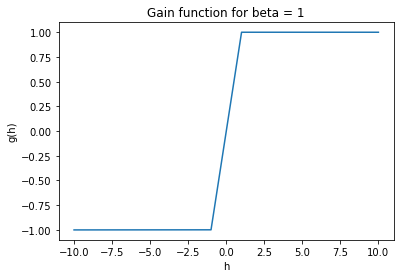

In [3]:
beta = 1
y_values = []

for t in t_range:
    y = g(t, beta)
    y_values.append(y)


plt.figure()
plt.plot(t_range, y_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 1')
plt.savefig('Gain_Function.png')

### Question 3.2

See report for theoretical answer

### Question 3.3

In [37]:
betas = np.arange(1, 1010, 10)
betas[1:] = betas[1:]-1
pattern_size = 10
capacity = []
N = 100
running_iterations = 100
betas

array([   1,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000])

In [39]:
def update_function(state_s0, weights):
    global beta
    random_neuron_idx_list = np.random.permutation(len(state_s0))
    state_s1 = state_s0.copy()
    for i in range(len(random_neuron_idx_list)):
        rand_neuron_i = random_neuron_idx_list[i]
        h_i = np.dot(weights[:, rand_neuron_i], state_s1)
        prop_state_s1_on = np.minimum(1, np.maximum(-1, beta*h_i))
        # the update here is probabilistic and in the next line we do the inference step
        state_s1[rand_neuron_i] = 1 if prop_state_s1_on > np.random.rand() else -1 
    return state_s1

In [40]:
for beta in betas:
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    hopfield_net.set_dynamics_to_user_function(update_function)
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
    identical_count = 0
    
    for i in range(running_iterations):
        pattern_list = []
        # add random patterns to the list
        pattern_list.extend(factory.create_random_pattern_list(nr_patterns=14, on_probability=0.5))
        # let the hopfield network "learn" the patterns. Note: they are not stored
        # explicitly but only network weights are updated !
        hopfield_net.store_patterns(pattern_list)
        # initialize with original pattern
        hopfield_net.set_state_from_pattern(pattern_list[0])
        # from this initial state, let the network dynamics evolve. 
        states = hopfield_net.run_with_monitoring(nr_steps=5) # T-1 gets us to state 5
        # each network state is a vector. reshape it to the same shape used to create the patterns.
        states_as_patterns = factory.reshape_patterns(states)
        # plot the states of the network
        # plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
        if (np.sum(states_as_patterns[-1] == pattern_list[0])) >= 99:
            # We have identical patterns, one neuron state was flipped after 5 iterations
            identical_count += 1
    
    P_star = identical_count/running_iterations
    capacity.append(P_star/N)
    print('For Beta='+str(beta)+', The Capacity='+str(P_star/N))

For Beta=1, The Capacity=0.0
For Beta=10, The Capacity=0.0084
For Beta=20, The Capacity=0.0089
For Beta=30, The Capacity=0.0088
For Beta=40, The Capacity=0.008199999999999999
For Beta=50, The Capacity=0.0092
For Beta=60, The Capacity=0.009000000000000001
For Beta=70, The Capacity=0.0088
For Beta=80, The Capacity=0.0091
For Beta=90, The Capacity=0.0087
For Beta=100, The Capacity=0.0086
For Beta=110, The Capacity=0.008100000000000001
For Beta=120, The Capacity=0.008199999999999999
For Beta=130, The Capacity=0.0085
For Beta=140, The Capacity=0.009000000000000001
For Beta=150, The Capacity=0.0089
For Beta=160, The Capacity=0.008199999999999999
For Beta=170, The Capacity=0.0083
For Beta=180, The Capacity=0.0083
For Beta=190, The Capacity=0.0084
For Beta=200, The Capacity=0.009399999999999999
For Beta=210, The Capacity=0.0085
For Beta=220, The Capacity=0.0088
For Beta=230, The Capacity=0.0083
For Beta=240, The Capacity=0.0091
For Beta=250, The Capacity=0.0086
For Beta=260, The Capacity=0.008

In [ ]:
plt.scatter(betas, capacity)
plt.xlabel('Beta')
plt.ylabel('Capacity')
plt.title('Capacity as a function of Beta')

### Question 3.4

Text(0.5, 1.0, 'Gain function for beta = 1')

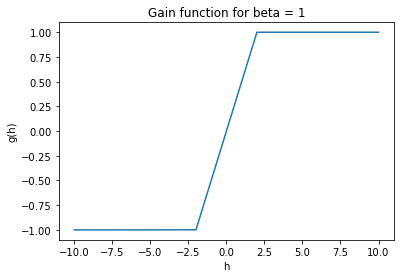

In [102]:
beta = 0.5
y_values = []

for t in t_range:
    y = g(t, beta)
    y_values.append(y)


plt.figure()
plt.plot(t_range, y_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 0.5')

Text(0.5, 1.0, 'Gain function for beta = 1')

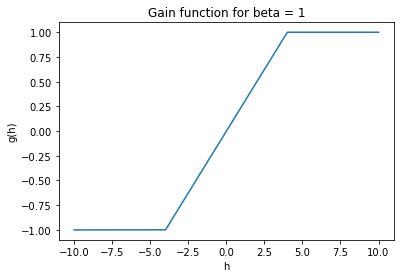

In [103]:
beta = 0.25
y_values = []

for t in t_range:
    y = g(t, beta)
    y_values.append(y)


plt.figure()
plt.plot(t_range, y_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 0.25')

Text(0.5, 1.0, 'Gain function for beta = 1')

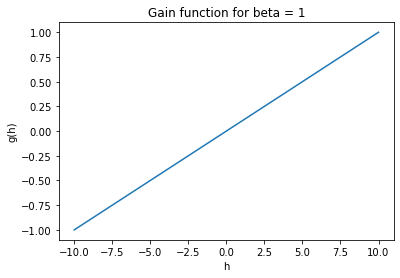

In [104]:
beta = 0.1
y_values = []

for t in t_range:
    y = g(t, beta)
    y_values.append(y)


plt.figure()
plt.plot(t_range, y_values)
plt.xlabel('h')
plt.ylabel('g(h)')
plt.title('Gain function for beta = 0.1')

### Question 3.5

See report for theoretical answer